In [1]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader(r"C:\Users\Sergio\Desktop\TWS\tws-workspace\closeAI\Examples\content_generation\content\Manual-nutricion-dietetica-CARBAJAL.pdf")
pages = loader.load_and_split()

ValueError: File path ../content/Manual-nutricion-dietetica-CARBAJAL.pdf is not a valid file or url

In [2]:
import re

def clean_text(text):
    # Remove multiple non-breaking spaces
    text = text.replace('\xa0', ' ')
    # Remove multiple newline characters
    text = text.replace('\n', ' ')
    # Remove page numbers
    text = re.sub('\s+\d+\s*', '', text)
    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    # Replace special characters with bullet points
    text = text.replace('\uf0b7', '*')
    # Replace multiple ellipsis with a single one
    text = re.sub('\.\.\.\.+', '...', text)
    # Remove multiple spaces
    text = re.sub(' +', ' ', text)
    #Header
    text = re.sub('Manual de Nutrición y Dietética Ángeles Carbajal Azcona. Departamento de Nutrición. Facultad de Farmacia. Universidad Complutense de Madrid', '', text)
    # Return the cleaned text
    return text.strip()

for page in pages:
    page.page_content = clean_text(page.page_content)

all_content = [page.page_content for page in pages]


In [3]:
from langchain import OpenAI


OPENAI_API_KEY = ""
llm = OpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)

In [4]:
data = ' '.join(all_content)
len_tokens = len(data)

print(f"This book has {len_tokens} characters in it")

num_tokens = llm.get_num_tokens(data)

print (f"This book has {num_tokens} tokens in it")

This book has 579159 characters in it
This book has 201523 tokens in it


In [5]:

# Loaders
from langchain.schema import Document

# Splitters
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Model
from langchain.chat_models import ChatOpenAI

# Embedding Support
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Summarizer we'll use for Map Reduce
from langchain.chains.summarize import load_summarize_chain

# Data Science
import numpy as np
from sklearn.cluster import KMeans

In [6]:
# text = pages

In [7]:
# text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=15000, chunk_overlap=1000)

# docs = text_splitter.create_documents([text])

docs = pages



In [33]:
print(pages[1].page_content)

Índice. Algunos conceptos básicos …………………………………………………………………2. Composición corporal ………………………………………………………………………… * Composición corporal * Compartimentos corporales * Antropometría * Peso ideal * Índice de masa corporal * Índice de masa corporal adecuado * Obesidad3. Ingestas recomendadas, objetivos nutricionales y guías alimentarias … * Ingestas recomendadas de energía y nutrientes * Ingestas dietéticas de referencia, nuevo enfoque * Uso de las ingestas recomendadas * Tablas de ingestas recomendadas para la población española * Objetivos nutricionales * Guías alimentarias4. Energía ………………………………………………………………………………………………. * Energía * Unidades de energía * Perfil calórico * Componentes del gasto energético * Cálculo de las necesidades de energía * Balance necesidades / ingesta de energía * Calorías vacías5. Proteínas …………………………………………………………………………………………… * Proteínas * Aminoácidos esenciales y no esenciales * Calidad de la proteína6. Grasas y lípidos …………………………………………………………………………………… * Lípidos 

In [8]:
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 381 documents


In [9]:
embeddings = OpenAIEmbeddings(openai_api_key="")

vectors = embeddings.embed_documents([x.page_content for x in docs])

In [10]:
# Assuming 'embeddings' is a list or array of 1536-dimensional embeddings

# Choose the number of clusters, this can be adjusted based on the book's content.
# I played around and found ~10 was the best.
# Usually if you have 10 passages from a book you can tell what it's about
num_clusters = 20

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
kmeans.labels_

array([ 0, 11, 24, 14,  6, 14,  7,  7,  9,  2, 11, 11, 11, 11, 11, 11, 11,
       21, 22, 22, 22, 22, 22, 22, 13, 22, 22, 13, 13, 13,  5, 13,  0, 14,
       15, 19, 19,  8,  8,  8,  8,  8,  8,  8,  8, 19, 12, 12, 12, 12,  9,
       20, 20, 20, 20, 20, 20, 20, 13, 19, 19, 12, 19, 12, 23, 23, 23,  2,
        2,  3, 10, 10, 10, 10, 10, 10, 10,  2, 18, 24, 16, 16, 18, 18, 18,
       24, 16, 16,  5,  5,  5, 24,  5,  2,  5, 24,  5, 21,  5,  5,  5,  5,
        5,  5,  5, 24, 24, 24, 24, 24,  7, 19,  7,  7, 24, 24, 12, 24, 12,
       12, 12, 24, 12, 17, 12, 24, 24, 20, 20, 12, 12, 12, 12, 12, 12, 12,
       12,  5,  2, 20, 16,  2,  2, 10,  4,  4,  5,  4,  4, 12,  7,  7, 13,
        0,  1, 22,  1,  1,  1,  1,  1,  1,  1,  1, 15, 15, 15, 15,  4, 15,
       15, 14, 21, 21, 14,  7, 14, 24, 14, 14, 13, 13,  6,  3,  9,  9,  9,
        1,  1,  1, 14, 14, 14, 15,  9, 22, 22, 22,  9,  6, 19, 13, 14, 14,
       21, 14,  3,  3,  2,  3,  3,  3,  3,  3,  3,  3,  3, 20,  3,  3, 21,
        3, 14, 24,  2,  2

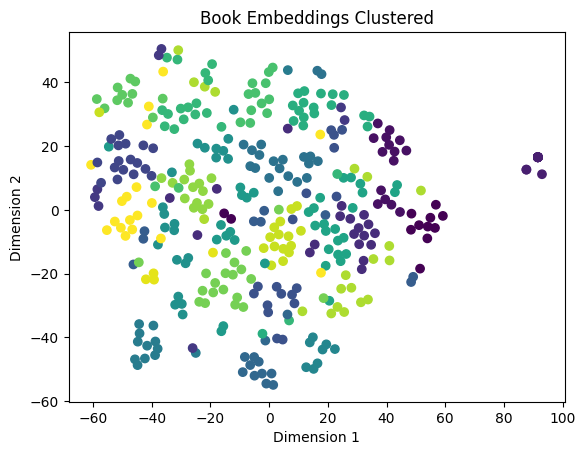

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Taking out the warnings
import warnings
from warnings import simplefilter

# Filter out FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Convert vectors to a numpy array
vectors_np = np.array(vectors)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(vectors_np)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

In [13]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):
    
    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)
    
    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)
    
    # Append that position to your closest indices list
    closest_indices.append(closest_index)

In [14]:
selected_indices = sorted(closest_indices)
selected_indices

[7,
 13,
 31,
 56,
 65,
 67,
 104,
 114,
 131,
 147,
 156,
 171,
 197,
 226,
 235,
 251,
 274,
 281,
 283,
 325,
 338,
 339,
 353,
 363,
 377]

In [15]:
llm3 = ChatOpenAI(temperature=0,
                 openai_api_key="",
                 max_tokens=10000,
                 model='gpt-3.5-turbo-16k'
                )

In [16]:
# from langchain import PromptTemplate


# map_prompt = """
# You will be given a text from a nutrition pdf. This section will be enclosed in triple backticks (```)
# Your goal is to develop a deletion of the unnecessary text of this pdf so that we can get the best text and most useful to develop the best content for a question and answers assessment of nutrition to evaluate professionals.
# Your response should give all the information you consider valuable. The more useful data you retain , the better it will be.

# ```{text}```
# FULL VALUABLE TEXT:
# """
# map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [17]:
# from langchain import PromptTemplate


# map_prompt = """
# Obtendras texto procedente de un pdf de nutrición. Esta sección estará comprendida entre triples backticks (```) \n
# Tu meta es mantener texto valioso y necesario para que sea usado posteriormente para la generación de preguntas y respuestas para la evaluación de nutricionistas profesionales. \n
# Tu respuesta nos debe proporcional toda la información que consideres valiosa para generar contenido. Cuanto mas valiosa , relacionada y necesaria sea la información, mejor será la evaluación. \n
# ```{text}```
# TEXTO VALIOSO ENTERO:
# """
# map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [18]:
from langchain import PromptTemplate


map_prompt = """
Obtendras texto procedente de un pdf de nutrición. Esta sección estará comprendida entre triples dollars ($$$) \n
No elimines texto, simplemente limpialo para que no posea caracteres o secciones innecesarias.
TEXTO VALIOSO ENTERO:
$$${text}$$$

"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [19]:
map_chain = load_summarize_chain(llm=llm3,
                             chain_type="stuff",
                             prompt=map_prompt_template)

In [20]:
selected_docs = [docs[doc] for doc in selected_indices]


In [21]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):
    
    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])
    
    # Append that summary to your list
    summary_list.append(chunk_summary)
    
    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n")

Summary #0 (chunk #7) - Preview: de la Nutrición y del Arte de la Dietética, en la que también interviene la Gastronomía o el arte de preparar con los alimentos elegidos una buena comida: equilibrada, apetecible y con buena digestibilidad. Los componentes de los alimentos que llevan 

Summary #1 (chunk #13) - Preview: Las zonas centrales del cuerpo. La relación circunferencia de cintura / circunferencia de cadera (RCC) permite estimar el riesgo de enfermedad crónica relacionado con la distribución de la grasa corporal. El ejercicio físico también condiciona la com 

Summary #2 (chunk #31) - Preview: nutricionales para la población Española (SENC,; FAO/WHO,; EFSA,) Rango aceptable de distribución de macronutrientes: Proteínas–15 % VCT Grasa total <% o <% VCT (si se consumen aceites monoinsaturados en alta proporción (aceite de oliva)) AGS <‐8% VC 

Summary #3 (chunk #56) - Preview: El interés por los ácidos grasos trans ha surgido como consecuencia de los resultados de diversos estudios

In [22]:
summaries = "\n".join(summary_list)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 17157 tokens


In [23]:
llm4 = ChatOpenAI(temperature=0,
                 openai_api_key=OPENAI_API_KEY,
                 max_tokens=10000,
                 model='gpt-3.5-turbo-16k',
                 request_timeout=120
                )

In [24]:
combine_prompt = """
Se te va a proporcionar una serie de textos sobre un pdf de nutrición. Los textos estarán comprendidos entre triples backsticks (```) \n
Tu meta consiste en unificar todos los textos en uno ( verbose text) manteniendo toda la información posible para la generación de contenidos de preguntas sobre nutrición. \n
Deberás complementar la información con tus conocimientos propios sobre el texto aportado, de tal manera que la generación de contenido sea mas valiosa y amplia. \n
Deberemos tener un texto mas extenso, con información de calidad y valiosa.
```{text}```
VERBOSE TEXT:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [25]:
reduce_chain = load_summarize_chain(llm=llm4,
                             chain_type="stuff",
                             prompt=combine_prompt_template,
#                              verbose=True # Set this to true if you want to see the inner workings
                                   )

In [26]:
output = reduce_chain.run([summaries])

InvalidRequestError: This model's maximum context length is 16385 tokens. However, you requested 23590 tokens (13590 in the messages, 10000 in the completion). Please reduce the length of the messages or completion.

In [ ]:
print (output)

La nutrición es un proceso esencial para el funcionamiento adecuado del organismo, ya que proporciona los nutrientes necesarios para mantener una buena salud. Estos nutrientes incluyen carbohidratos, proteínas, grasas, vitaminas y minerales. Una alimentación equilibrada y variada es fundamental para asegurar la ingesta adecuada de todos estos nutrientes.

Los carbohidratos son la principal fuente de energía del cuerpo y se encuentran en alimentos como el pan, el arroz, las pastas y las frutas. Las proteínas son necesarias para el crecimiento y reparación de tejidos, y se encuentran en alimentos como la carne, el pescado, los huevos y los lácteos. Las grasas también son una fuente de energía, pero deben consumirse con moderación y se encuentran en alimentos como el aceite, la mantequilla y los frutos secos. Las vitaminas y minerales son necesarios en pequeñas cantidades para el correcto funcionamiento del organismo y se encuentran en alimentos como las frutas, las verduras y los lácteos

In [ ]:
len_tokens = len(output)

print(f"This book has {len_tokens} characters in it")

num_tokens = llm.get_num_tokens(output)

print (f"This book has {num_tokens} tokens in it")

This book has 3489 characters in it
This book has 1118 tokens in it
